# CS189 Introduction to Machine Learning Graduate Project 

## Dan Kim, SID 3034464490

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
import zipfile
import os
import csv
import re
from sklearn import linear_model as lm

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder



In [173]:
#Util python codes
def train_test_set_split(data, percentage):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    proportion = int(percentage*data_len)
    training = shuffled_indices[0:proportion]
    test = shuffled_indices[proportion:]
    return data.iloc[training], data.iloc[test]

def process_data_gm(data, pipeline_functions, prediction_col):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    X = data.drop(columns=[prediction_col]).to_numpy()
    y = data.loc[:, prediction_col].to_numpy()
    return X, y

def ohe_year_month(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Year_Month']])
    dummies = pd.DataFrame(oh_enc.transform(data[['Year_Month']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)

def ohe_state(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['State']])
    dummies = pd.DataFrame(oh_enc.transform(data[['State']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)


def ohe_sex(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Sex']])
    dummies = pd.DataFrame(oh_enc.transform(data[['Sex']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)


def ohe_age_group(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder(handle_unknown = 'ignore')
    oh_enc.fit(data[['Age Group']])
    dummies = pd.DataFrame(oh_enc.transform(data[['Age Group']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)

def ohe_condition(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Condition']])
    dummies = pd.DataFrame(oh_enc.transform(data[['Condition']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)


def ohe_condition_group(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Condition Group']])
    dummies = pd.DataFrame(oh_enc.transform(data[['Condition Group']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)


def ohe_month(data):
    """
    One-hot-encodes roof material.  New columns are of the form x0_MATERIAL.
    """
    ...
    # BEGIN SOLUTION NO PROMPT
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['Month']])
    dummies = pd.DataFrame(oh_enc.transform(data[['Month']]).todense(),
                           columns=oh_enc.get_feature_names_out(),
                           index = data.index)
    return data.join(dummies)

def drop_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

def data_no_yearmonth(data):
    data = data[["Age Group", "Sex", "State", "Covid Death"]]

    #One hot encoding
    #data = ohe_year_month(data)
    data = ohe_state(data)
    data = ohe_age_group(data)
    data = ohe_sex(data)
    data = data.drop(["Age Group",'Sex', "State"], axis=1)
    data = data[~data["Covid Death"].isna()]
    return data


def data_no_state(data):
    data = data[["Year_Month", "Sex", "Age Group", "Covid Death"]]

    #One hot encoding
    data = ohe_year_month(data)
    #data = ohe_state(data)
    data = ohe_age_group(data)
    data = ohe_sex(data)
    data = data.drop(["Year_Month",'Sex', "Age Group"], axis=1)
    data = data[~data["Covid Death"].isna()]
    return data

def data_no_sex(data):
    data = data[["Year_Month", "State", "Age Group", "Covid Death"]]

    #One hot encoding
    data = ohe_year_month(data)
    data = ohe_state(data)
    data = ohe_age_group(data)
    #data_no_sex= ohe_sex(data_no_sex)
    data = data.drop(["Year_Month",'State', "Age Group"], axis=1)
    data = data[~data["Covid Death"].isna()]
    return data

def data_no_agegroup(data):
    data = data[["Year_Month", "Sex", "State", "Covid Death"]]

    #One hot encoding
    data = ohe_year_month(data)
    data = ohe_state(data)
    #data = ohe_age_group(data)
    data= ohe_sex(data)
    data = data.drop(["Year_Month",'Sex', "State"], axis=1)
    data = data[~data["Covid Death"].isna()]
    return data


# Data Sampling and Collection

Two datasets on mortality caused by COVID-19 are collected by CDC (Centers for Disease Control and Prevention). The mortality rates caused by COVID-19 were reported to NCHS (National Center for Health Statistics) and the data are publicly available for analysis.

Some potential sampling bias that could occur in these datasets may pertinent to the granularity of the datasets particuarly in the age group. For example, the age group younger than 15 years old has finer resolution as opposed to other age group and for those patients older than 85 are entirely categorized as 85+ which reduces resolution.

In [8]:
#Import data
# change the working directory
by_conditions = pd.read_csv("/Users/dankim/Desktop/Courses/DataC200/Grad_project/cdc_death_counts_by_conditons.csv")
by_others = pd.read_csv("/Users/dankim/Desktop/Courses/DataC200/Grad_project/cdc_death_counts_by_sex_age_state.csv")

# Data Cleaning anad Preprocessing Data

Among the data, one data collected on deaths involving COVID-19, influenza, and pneumonia reported to NCHS with information on Sex, Age, and jurisdiction of occurence. The second data involves deaths caused by COVID-19 with information on patients' conditions, age group, and juridiction of occurence. The granualarity of each dataset which I preprocessed before the analysis is the number of deaths caused by COVID-19 for each month of year, age group, state reported, and sex of patients.

While merging these two datasets, the format of the Age Group columns had to be changed so that one dataset match the other dataset. For some age group, state, sex, and month group, the COVID-19 mortality data were missing and these data were omitted for the analysis. In addition, the covid mortality rate collected in year 2022 is incomplete as the data was collected upto March, 2022. Analyzing the data by year would give false representation where it would seem that covid mortality was low in year 2022, and same pitfall would be applied for monthly analysis. Therefore, I concatenated the year and month category so that each year and month are different from each other.

In [32]:
#Preprocess data and merge two datasets
by_others["Age Group"] = by_others["Age Group"].str.replace("85 years and over", "85+",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace("years", "",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace(" ", "",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace("Under1year", "0-24",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace("0-17", "0-24",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace("1-4", "0-24",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace("5-14", "0-24",regex=True)
by_others["Age Group"] = by_others["Age Group"].str.replace("15-24", "0-24",regex=True)

#Merge two datasets
merged_covid = pd.merge(by_conditions, by_others, how='inner', on=["Year", "Month","Age Group", "State"])

In [15]:
#Add number of patients deceased from COVID-19
merged_covid["Covid Death"] = merged_covid["COVID-19 Deaths_x"] + merged_covid["COVID-19 Deaths_y"]

In [56]:
#Clean year and month and concatenate, and sex
merged_covid_year_month = merged_covid[~merged_covid["Year"].isna() ]
merged_covid_year_month = merged_covid[~merged_covid["Month"].isna()]
merged_covid_year_month = merged_covid_year_month[merged_covid_year_month["Sex"] != "All Sexes"]
merged_covid_year_month = merged_covid_year_month[merged_covid_year_month["State"] != "United States"]
merged_covid_year_month["Year_Month"] = merged_covid_year_month["Year"].astype(str) + "-" + merged_covid_year_month["Month"].astype(str)

# EDA scatterplot of COVID-19 Death vs Month

The barplot below is the total number of COVID-19 death for each month. The COVID-19 Death rates were high during the winter espeically on January.

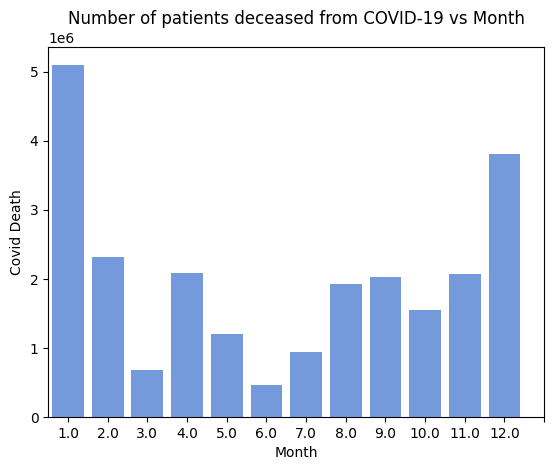

In [165]:
#EDA scatterplot of COVID-19 Death vs Month
month_agg = merged_covid_year_month.groupby("Month").agg(np.sum)["Covid Death"].reset_index()
sns.barplot(month_agg, x="Month", y="Covid Death", color="cornflowerblue")
plt.title("Number of patients deceased from COVID-19 vs Month")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()



# EDA scatterplot of COVID-19 Death vs Year

This barplot below is the total number of COVID-19 Death for each year. The number of covid mortality is highest in year 2021. In year 2022, it seems like the mortality is low, but the data is just incomplete where the data was only collected until March of 2022.

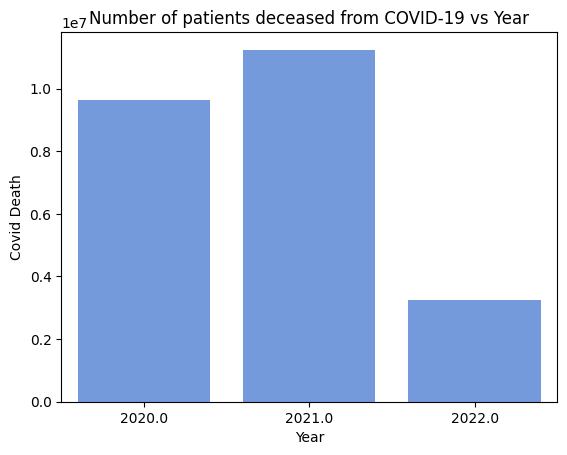

In [166]:
#EDA scatterplot of COVID-19 Death vs Year
year_agg = merged_covid_year_month.groupby("Year").agg(np.sum)["Covid Death"].reset_index()
sns.barplot(year_agg, x="Year", y="Covid Death", color="cornflowerblue")
plt.title("Number of patients deceased from COVID-19 vs Year")
plt.show()

# EDA scatterplot of COVID-19 Death vs States

The barplot plot below is the total number of COVID-19 Death for each State. The top 3 states that have the highest covid-19 mortality rates are California, Texas, and Florida.

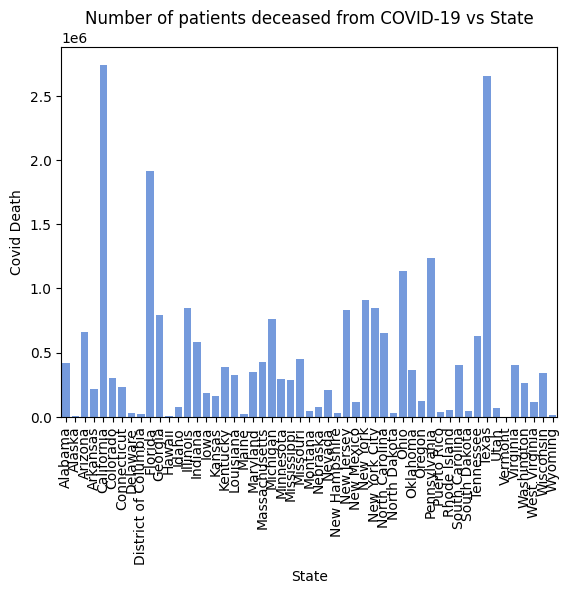

In [167]:
# EDA scatterplot of COVID-19 Death vs States

state_agg = merged_covid_year_month.groupby("State").agg(np.sum)["Covid Death"].reset_index()
sns.barplot(state_agg, x="State", y="Covid Death",color="cornflowerblue")

plt.title("Number of patients deceased from COVID-19 vs State")
plt.xticks(rotation=90)
plt.show()

# EDA scatterplot of COVID-19 Death vs Age Group

The barplot below is the total number of COVID-19 mortality for each age group. The aggregated results show that the age group bewteen 75 and 84 has the highest mortality rate from COVID-19, followed by 85+ and 65-74 age groups.

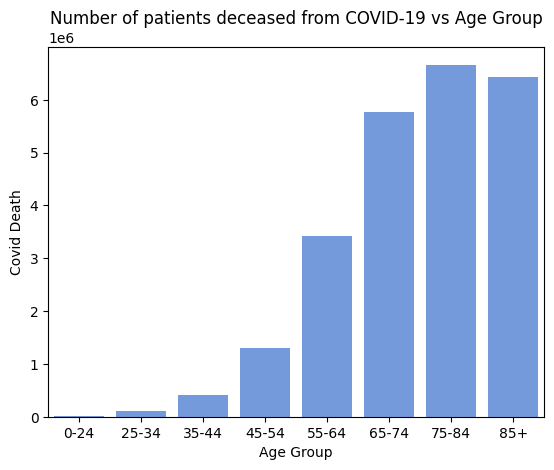

In [168]:
#EDA scatterplot of COVID-19 Death vs Age Group
agegroup_agg = merged_covid_year_month.groupby("Age Group").agg(np.sum)["Covid Death"].reset_index()

sns.barplot(data=agegroup_agg, x="Age Group", y= "Covid Death",color="cornflowerblue")
plt.title("Number of patients deceased from COVID-19 vs Age Group")
plt.show()

# EDA scatterplot of COVID-19 Death vs Sex


The barplot below is the number of COVID-19 mortality for each sex. The aggregated results show that male patients have slightly higher mortality rate than the female patients.

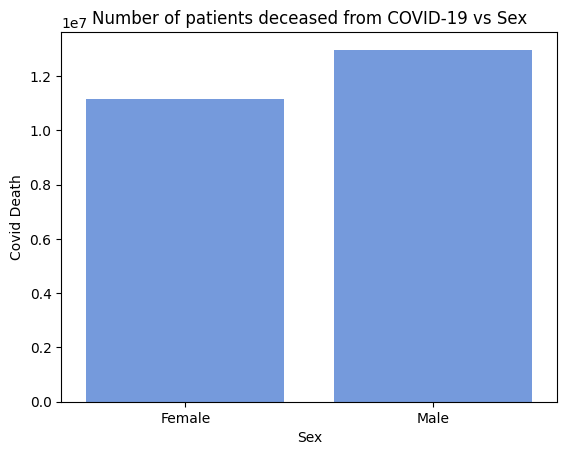

In [169]:
#EDA scatterplot of COVID-19 Death vs Sex
sex_agg = merged_covid_year_month.groupby("Sex").agg(np.sum)["Covid Death"].reset_index()

sns.barplot(data=sex_agg, x="Sex", y= "Covid Death",color="cornflowerblue")
plt.title("Number of patients deceased from COVID-19 vs Sex")
plt.show()

# Data Modeling and Inferences

After the two datasets were merged, features including "Year_month", "State", "Sex", "Age Group" were selected to build models to predict COVID-19 mortality. As these features categorical values, the column values were transformed using onehot encoding method. Other features such as "Condition Group" were not used because Condition Group was not taken into account for COVID-19 mortality for one of the datasets, so Condition Group would not accurately correspond to the merged COVID-19 mortality.

Regression models such as Ridge and lasso linear regression models and machine learning algorithm such as RandomForest regression models to predict COVID-19 mortality using various features such as "Year_month", "State", "Sex", or "Age group" features. The reason that I chose the linear model is because this is the most simple model and I wanted to see if the simple linear regression can accurately predic the COVID-19 mortality rate, or whether we need more complex non-linear models. 

In addition to the linear model, Random Forest machine learning model as non-linear model was chosen to see if this model can improve the accuracy of the model. Random Forest was chosen because the features (e.g. "Year_month", "State", "Sex", or "Age group") I would be using to build the model is categorical so algorithms using decision trees from random forest would be appropriate.

The Random Forest algorithm has several parameters that can be tuned that affects the accuracy including max_depth (max number of splits for each decision tree), min_number_splits (minimum number of samples to make splits), and n_estimators (number of decision trees in the random forest) generated. To obtain the best performing parameters in the random forest model, every combination of the parameters were tried and the combination of parameters that yield the lowest root mean square of the test data were chosen. To evaluate the performance of each model, root mean square error and R2 scores were measured on the test dataset and models that yield lowest root mean square error and highest R2 score were selected. For training and test dataset, one third for the entire dataset were randomly selected as test dataset, and the remaining were selected as training dataset. K-fold cross validation, with k=5, was used to increase the accuracy of the models.

Once a model is built, I was interested in how much of each feature contributes to the model. However, one downside of using random forest is having difficulty with interpreting the model. One way to circumvent this diffculty was to see how the model performs with or without certain featuresw with identical parameters. Apply this method, I generated each random forest model with or without certain features, and then assessed how much the performance of the model is affected using root mean square error and R2 coefficient of determination score on the test dataset.



## 1. Ridge linear regression model

In [43]:
#Linear Ridge regression model on the merged dataset
data = merged_covid_year_month[["Year_Month", "State", "Sex", "Age Group", "Covid Death"]]

#One hot encoding
data = ohe_year_month(data)
data = ohe_state(data)
data = ohe_age_group(data)
data= ohe_sex(data)
data = data.drop(["Year_Month", "State", "Sex", "Age Group"], axis=1)
data = data[~data["Covid Death"].isna()]

#train and test split
train, test = train_test_set_split(data, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

#Ridge linear Regression

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print("Linear ridge regression model score")
print("Training rmse: ", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Training R2 score: ", r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("Test rmse: ", np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("Test R2 score: ", r2_score(y_test, pred_test_rr))

Linear ridge regression model score
Training rmse:  142.84838639578783
Training R2 score:  0.33971201142251994
Test rmse:  144.804760039772
Test R2 score:  0.3326308288774862



## 2. Lasso linear regression model

In [45]:
#Linear Lasso regression model on the merged dataset
data = merged_covid_year_month[["Year_Month", "State", "Sex", "Age Group", "Covid Death"]]

#One hot encoding
data = ohe_year_month(data)
data = ohe_state(data)
data = ohe_age_group(data)
data= ohe_sex(data)
data = data.drop(["Year_Month", "State", "Sex", "Age Group"], axis=1)
data = data[~data["Covid Death"].isna()]

#train and test split
train, test = train_test_set_split(data, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

#Lasso linear Regression

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print("Linear lasso regression model score")
print("Training rmse: ", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Training R2 score: ", r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("Test rmse: ", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Test R2 score: ", r2_score(y_test, pred_test_lasso))


Linear lasso regression model score
Training rmse:  145.07754353980167
Training R2 score:  0.3368637016108673
Test rmse:  140.24416227853825
Test R2 score:  0.3382745563001428


## 3. Random forest regression model on the merged dataset

In [178]:
#Linear Ridge regression model on the merged dataset
data = merged_covid_year_month[["Year_Month", "State", "Sex", "Age Group", "Covid Death"]]

#One hot encoding
data = ohe_year_month(data)
data = ohe_state(data)
data = ohe_age_group(data)
data= ohe_sex(data)
data = data.drop(["Year_Month", "State", "Sex", "Age Group"], axis=1)
data = data[~data["Covid Death"].isna()]

#train and test split
train, test = train_test_set_split(data, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [150,250,350],
    'criterion' :['squared_error'],
    'n_estimators': [100,200],
    "min_samples_split" : [10,5,20]
}
# Create a base model
rfCV = RandomForestRegressor()

# Instantiate the grid search model
regCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
model_rf_cv = regCV.fit(X_train, y_train);
pred_train_rf_cv = model_rf_cv.predict(X_train)

print("Random forest regression model score")
print("Training RMSE value: ",np.sqrt(mean_squared_error(y_train,pred_train_rf_cv)))
print("Training R2 score:", r2_score(y_train, pred_train_rf_cv))

pred_test_rf_cv= model_rf_cv.predict(X_test)
print("Test RMSE value: ", np.sqrt(mean_squared_error(y_test,pred_test_rf_cv))) 
print("Test R2 score: ", r2_score(y_test, pred_test_rf_cv))





Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=27.4min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=20, n_estimators=100; total time=13.6min
[CV] END criterion=squared_error, max_depth=250, min_samples_split=10, n_estimators=100; total time=13.6min
[CV] END criterion=squared_error, max_depth=250, min_samples_split=5, n_estimators=100; total time=13.6min
[CV] END criterion=squared_error, max_depth=250, min_samples_split=20, n_estimators=100; total time=13.6min
[CV] END criterion=squared_error, max_depth=250, min_samples_split=20, n_estimators=200; total time=26.8min
[CV] END criterion=squared_error, max_depth=350, min_samples_split=5, n_estimators=100; total time=13.6min
[CV] END criterion=squared_error, max_depth=350, min_samples_split=20, n_estimators=100; total time=13.4min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=5, n_estim

## 4. Random forest regression model on the merged dataset without "Year_Month" feature

In [174]:
#Random forest on merged dataset without "Year_month" feature

#Preprocess data without year_month feature
data_no_year_month = data_no_yearmonth(merged_covid_year_month)

#train and test split
train, test = train_test_set_split(data_no_year_month, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    "max_depth":[150],
    'criterion' :['squared_error'],
    'n_estimators': [200],
    "min_samples_split" : [10]
}
# Create a base model
rfCV = RandomForestRegressor()

# Instantiate the grid search model
regCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
model_rf_cv = regCV.fit(X_train, y_train);
pred_train_rf_cv = model_rf_cv.predict(X_train)


print("Random forest regression model score without Year_month feature")
print("Training RMSE value: ",np.sqrt(mean_squared_error(y_train,pred_train_rf_cv)))
print("Training R2 score:", r2_score(y_train, pred_train_rf_cv))

pred_test_rf_cv= model_rf_cv.predict(X_test)
print("Test RMSE value: ", np.sqrt(mean_squared_error(y_test,pred_test_rf_cv))) 
print("Test R2 score: ", r2_score(y_test, pred_test_rf_cv))












Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 9.1min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 9.1min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 9.1min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 9.1min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 9.1min
Random forest regression model score without Year_month feature
Training RMSE value:  138.05124243840723
Training R2 score: 0.3945465896286984
Test RMSE value:  135.5672465060647
Test R2 score:  0.39254843813825824


## 5. Random forest regression model on the merged dataset without "State" feature

In [175]:
#Random forest on merged dataset without "State" feature

#Preprocess data without State feature
data_no_state = data_no_state(merged_covid_year_month)

#train and test split
train, test = train_test_set_split(data_no_state, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    "max_depth":[150],
    'criterion' :['squared_error'],
    'n_estimators': [200],
    "min_samples_split" : [10]
}
# Create a base model
rfCV = RandomForestRegressor()

# Instantiate the grid search model
regCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
model_rf_cv = regCV.fit(X_train, y_train);
pred_train_rf_cv = model_rf_cv.predict(X_train)


print("Random forest regression model score without State feature")
print("Training RMSE value: ",np.sqrt(mean_squared_error(y_train,pred_train_rf_cv)))
print("Training R2 score:", r2_score(y_train, pred_train_rf_cv))

pred_test_rf_cv= model_rf_cv.predict(X_test)
print("Test RMSE value: ", np.sqrt(mean_squared_error(y_test,pred_test_rf_cv))) 
print("Test R2 score: ", r2_score(y_test, pred_test_rf_cv))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random forest regression model score without State feature
Training RMSE value:  141.9768603232959
Training R2 score: 0.34412518476762444
Test RMSE value:  144.91286721120673
Test R2 score:  0.3389126289982849


## 6. Random forest regression model on the merged dataset without "Sex" feature

In [176]:
#Random forest on merged dataset without "Sex" feature

#Preprocess data without sex feature
data_no_sex = data_no_sex(merged_covid_year_month)

#train and test split
train, test = train_test_set_split(data_no_sex, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    "max_depth":[150],
    'criterion' :['squared_error'],
    'n_estimators': [200],
    "min_samples_split" : [10]
}
# Create a base model
rfCV = RandomForestRegressor()

# Instantiate the grid search model
regCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
model_rf_cv = regCV.fit(X_train, y_train);
pred_train_rf_cv = model_rf_cv.predict(X_train)


print("Random forest regression model score without Sex feature")
print("Training RMSE value: ",np.sqrt(mean_squared_error(y_train,pred_train_rf_cv)))
print("Training R2 score:", r2_score(y_train, pred_train_rf_cv))

pred_test_rf_cv= model_rf_cv.predict(X_test)
print("Test RMSE value: ", np.sqrt(mean_squared_error(y_test,pred_test_rf_cv))) 
print("Test R2 score: ", r2_score(y_test, pred_test_rf_cv))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 3.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 3.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=12.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 3.8min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=12.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time= 3.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=12.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=12.7min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_esti

## 7. Random forest regression model on the merged dataset without "Age Group" feature

In [177]:
#Random forest on merged dataset without "Age Group" feature

#Preprocess data without Age Group feature
data_no_agegroup = data_no_agegroup(merged_covid_year_month)

#train and test split
train, test = train_test_set_split(data_no_agegroup, 0.67)

X_train = train.drop(['Covid Death'], axis=1)
y_train = train["Covid Death"]

X_test = test.drop(["Covid Death"], axis=1)
y_test = test["Covid Death"]

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    "max_depth":[150],
    'criterion' :['squared_error'],
    'n_estimators': [200],
    "min_samples_split" : [10]
}
# Create a base model
rfCV = RandomForestRegressor()

# Instantiate the grid search model
regCV = GridSearchCV(estimator = rfCV, cv=5,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
model_rf_cv = regCV.fit(X_train, y_train);
pred_train_rf_cv = model_rf_cv.predict(X_train)


print("Random forest regression model score without Age Group feature")
print("Training RMSE value: ",np.sqrt(mean_squared_error(y_train,pred_train_rf_cv)))
print("Training R2 score:", r2_score(y_train, pred_train_rf_cv))

pred_test_rf_cv= model_rf_cv.predict(X_test)
print("Test RMSE value: ", np.sqrt(mean_squared_error(y_test,pred_test_rf_cv))) 
print("Test R2 score: ", r2_score(y_test, pred_test_rf_cv))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=14.4min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=14.4min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=14.4min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=14.4min
[CV] END criterion=squared_error, max_depth=150, min_samples_split=10, n_estimators=200; total time=14.5min
Random forest regression model score without Age Group feature
Training RMSE value:  126.61843897641728
Training R2 score: 0.4883750015726064
Test RMSE value:  125.2119554942698
Test R2 score:  0.4866857155758334
